<a href="https://colab.research.google.com/github/dasdebjeet/data_science/blob/main/Deep%20Learning/Neural%20Network%20using%20Fashion%20MNIST%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepLearning using the Fashion MNIST dataset

##<br> Import the nessecary modules

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

##<br> Load the Fashion MNIST dataset

In [ ]:
f_mnist = keras.datasets.fashion_mnist

Class of f-mnist 

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot





In [ ]:
# just naming the cloth names into a list for later use
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##<br> Splitting the dataset into Test and Train

In [ ]:
(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

<br>Lets see now what image is in the index no. 0

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

<br>

Plot the image at the index no. 0

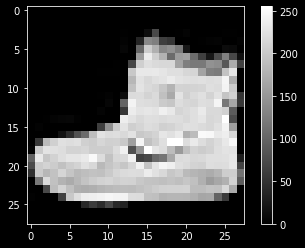

In [ ]:
plt.style.use(['dark_background'])

plt.imshow(train_images[0])
plt.colorbar()
plt.gray()

In [ ]:
print(class_names[train_labels[0]])

Ankle boot


##<br>Preprocessing of Data

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a
float, and divide by 255.

In [ ]:
train_images = train_images / 225.0
test_images = test_images / 225.0 

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<br> Now, lets see the first 25 images

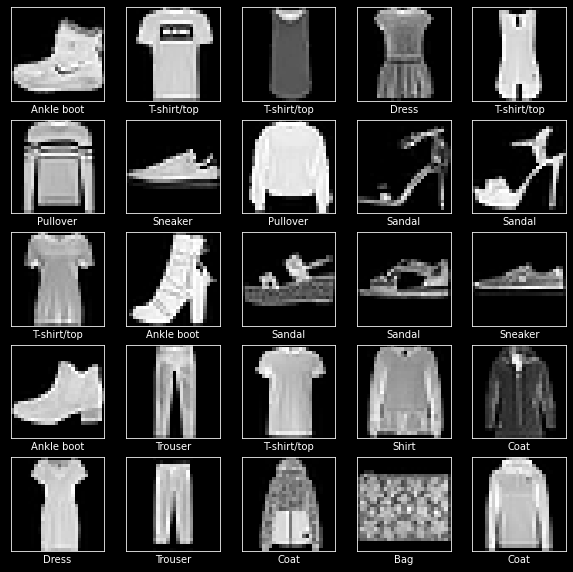

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use(['dark_background'])
# %matplotlib inline

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.gray()
  plt.grid(False)
  plt.xlabel(class_names[train_labels[i]])

## **Build the Model**

Setup the layers of the NN

In [ ]:
model = keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),       # flatten the 2D array (28x28) of image into 1D array i.e (784) 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')     # output class --  probability distribution btw 0-1
])

<br> Complie the layers

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)

## <br>Train the Model

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2800 - accuracy: 0.8964
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.9002
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2561 - accuracy: 0.9047
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2468 - accuracy: 0.9088
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2394 - accuracy: 0.9112
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2312 - accuracy: 0.9142
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2210 - accuracy: 0.9183
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2166 - accuracy: 0.9192
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2096 - accuracy: 0.9213
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.204

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("accuracy: ", test_acc)
print("loss: ", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8897
accuracy:  0.8896999955177307
loss:  0.34676072001457214


## <br>Make Prediction

In [ ]:
pred = model.predict(test_images)

In [ ]:
pred[0]

array([4.4787852e-05, 2.0179493e-11, 1.6544344e-09, 7.6794480e-11,
       5.5683107e-09, 1.1382639e-02, 3.6543905e-05, 6.9692290e-01,
       1.4730857e-08, 9.9924386e-01], dtype=float32)

Predicted value of index 0

In [ ]:
p_res = np.argmax(pred[0])
class_names[p_res]

'Ankle boot'

Actual value of index 0

In [ ]:
ac_res = test_labels[0]
class_names[ac_res]

'Ankle boot'

Seems, its a pretty good model 

<br> Confusion Matrix

In [ ]:
# get the labels of the predicted labels from the predicted values
pred_labels = [np.argmax(i) for i in pred]
pred_labels[:5]

[9, 2, 1, 1, 6]

In [ ]:
cm = tf.math.confusion_matrix(labels=test_labels, predictions=pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[865,   0,  18,  14,   2,   0,  89,   0,  12,   0],
       [  3, 971,   1,  16,   3,   0,   4,   0,   2,   0],
       [ 21,   1, 822,  11, 108,   0,  35,   0,   2,   0],
       [ 22,   2,  10, 920,  15,   0,  25,   0,   6,   0],
       [  1,   0,  81,  41, 840,   0,  32,   0,   5,   0],
       [  0,   0,   0,   0,   0, 938,   0,  33,   3,  26],
       [139,   0, 103,  26,  91,   0, 625,   0,  16,   0],
       [  0,   0,   0,   0,   0,   4,   0, 961,   2,  33],
       [  5,   0,   3,   4,   4,   1,   1,   3, 979,   0],
       [  0,   0,   0,   0,   0,   2,   1,  21,   0, 976]], dtype=int32)>

Text(87.0, 0.5, 'Actual')

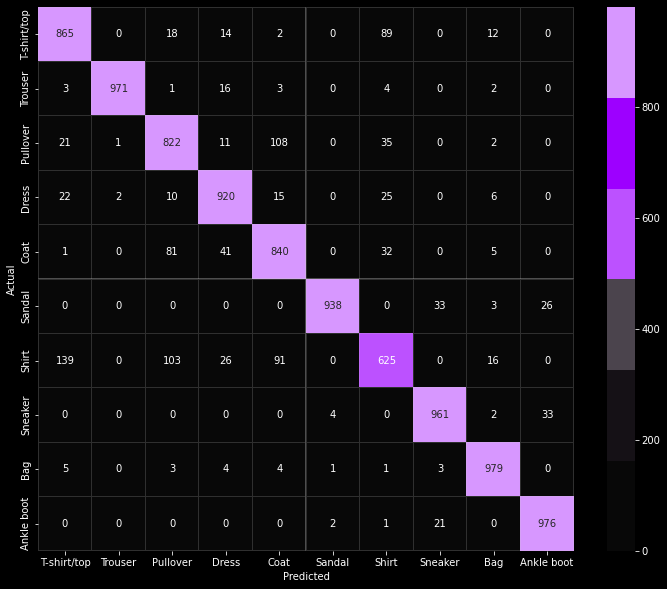

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))

colormap = sns.color_palette([ "#080808", "#151116", "#4b444d", "#bc51ff", "#9d00ff", "#d797ff"])
sns.heatmap(cm, cmap=colormap, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, linewidths=0.1, linecolor="#cdcdcd33")
plt.xlabel("Predicted")
plt.ylabel("Actual")